In [2]:
import uproot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import awkward as ak
import numpy as np
import math

In [3]:
#Have been instructed to check out the reconstruction file for the pileup information! 
import ROOT as root

Welcome to JupyROOT 6.26/16


In [4]:
reco_file = uproot.open("/sdf/home/t/tanaka/tms/MicroProdN4p1/run-tms-reco/MicroProdN4p1_NDComplex_FHC.tmsreco.full/TMSRECO/0002000/0002400/MicroProdN4p1_NDComplex_FHC.tmsreco.full.0002459.TMSRECO.root")

In [5]:
#trees
reco_trees = reco_file.keys()
print(reco_trees)

['Truth_Info;2', 'Truth_Info;1', 'Line_Candidates;2', 'Line_Candidates;1', 'Reco_Tree;2', 'Reco_Tree;1', 'Truth_Spill;1']


In [6]:
truth_info_tree = reco_file['Truth_Info']
truth_info_tree.keys()

['EventNo',
 'SpillNo',
 'RunNo',
 'IsCC',
 'Interaction',
 'TruthInfoIndex',
 'TruthInfoNSlices',
 'nPrimaryVertices',
 'HasPileup',
 'NeutrinoPDG',
 'NeutrinoP4',
 'NeutrinoX4',
 'nTrueParticles',
 'nTruePrimaryParticles',
 'nTrueForgottenParticles',
 'VertexID',
 'Parent',
 'TrackId',
 'PDG',
 'IsPrimary',
 'TrueVisibleEnergy',
 'TrueNHits',
 'TruePathLength',
 'TruePathLengthIgnoreY',
 'TruePathLengthInTMS',
 'TruePathLengthInTMSIgnoreY',
 'InteractionTMSFiducial',
 'InteractionTMSFirstTwoModules',
 'InteractionTMSThin',
 'InteractionLArFiducial',
 'TMSFiducialStart',
 'TMSFiducialTouch',
 'TMSFiducialEnd',
 'LArFiducialStart',
 'LArFiducialTouch',
 'LArFiducialEnd',
 'BirthMomentum',
 'BirthPosition',
 'DeathMomentum',
 'DeathPosition',
 'MomentumLArStart',
 'PositionLArStart',
 'MomentumLArEnd',
 'PositionLArEnd',
 'MomentumTMSStart',
 'PositionTMSStart',
 'MomentumTMSFirstTwoModulesEnd',
 'PositionTMSFirstTwoModulesEnd',
 'MomentumTMSThinEnd',
 'PositionTMSThinEnd',
 'MomentumTM

In [7]:
#Investigating truth branches. 
test_branch = truth_info_tree['RunNo']
test_branch.arrays()
iter = 0
for array in test_branch.arrays():
    #print(array.RunNo) 
    iter += 1
print(iter)

1266


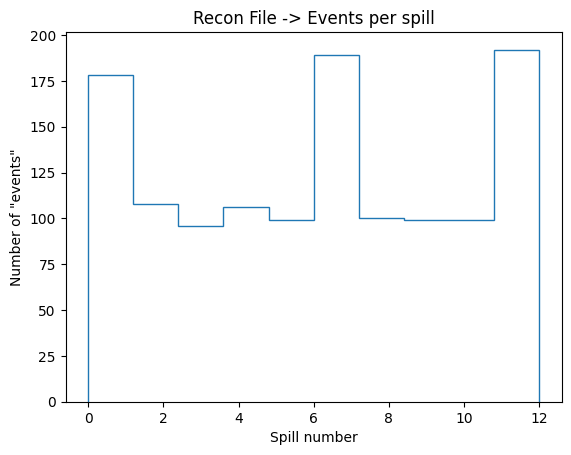

In [8]:
#number of "events" per spill number
plt.hist(truth_info_tree['SpillNo'].arrays().SpillNo, histtype='step')
plt.xlabel('Spill number')
plt.ylabel('Number of "events"')
plt.title('Recon File -> Events per spill')
plt.show()

In [10]:
#To mess around, lets plot a single event. Like a primative event display
TrueHitsPlane_branch = truth_info_tree['TrueHitPlane']
TrueHitsBar_branch = truth_info_tree['TrueHitBar']
TrueHitE_branch = truth_info_tree['TrueHitE']
event_n = 10
#check each true hit in the first event has same number of bar and plane information
print(np.size(TrueHitsPlane_branch.arrays().TrueHitPlane[event_n]))
print(np.size(TrueHitsBar_branch.arrays().TrueHitBar[event_n]))
print(np.size(TrueHitE_branch.arrays().TrueHitE[event_n]))
print(np.max(TrueHitE_branch.arrays().TrueHitE[event_n])) #hit energy MeV

74
74
74
4.2178583


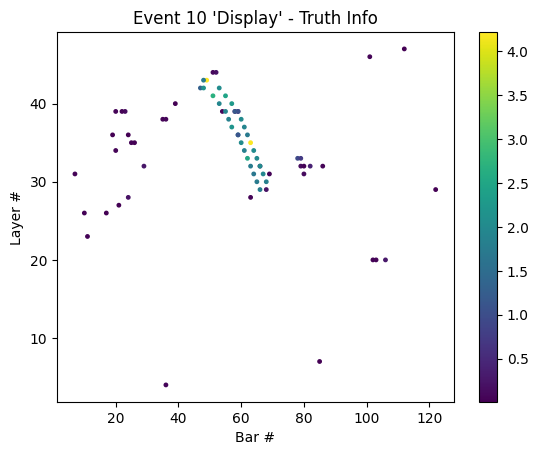

In [11]:
#color code this !
plt.scatter(TrueHitsBar_branch.arrays().TrueHitBar[event_n],TrueHitsPlane_branch.arrays().TrueHitPlane[event_n], s = 6, 
            c = TrueHitE_branch.arrays().TrueHitE[event_n], cmap = 'viridis')
plt.xlabel("Bar #")
plt.ylabel("Layer #")
plt.title(f"Event {event_n} 'Display' - Truth Info")
plt.colorbar()
plt.show()
#Play around with, some of these are pretty cool. 

846.99976
808.0058
74
38


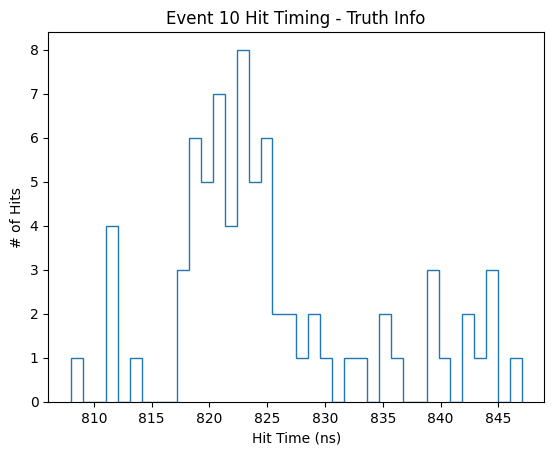

In [12]:
#Can take a look at true hit timing (single event)
TrueHitsT_branch = truth_info_tree['TrueHitT']
TrueHitsT_branch.arrays()[event_n].TrueHitT
max_time = np.max(TrueHitsT_branch.arrays()[event_n].TrueHitT)
min_time = np.min(TrueHitsT_branch.arrays()[event_n].TrueHitT)
n_hits = np.size(TrueHitsT_branch.arrays()[event_n].TrueHitT)
n_bins = int(math.floor((max_time - min_time)))
print(max_time)
print(min_time)
print(n_hits)
print((math.floor(n_bins)))
plt.hist(TrueHitsT_branch.arrays()[event_n].TrueHitT, range=(min_time,max_time), bins=n_bins, histtype='step' )
plt.xlabel("Hit Time (ns)")
plt.ylabel("# of Hits")
plt.title(f"Event {event_n} Hit Timing - Truth Info")
plt.show()

24549
23018.34765625
53.18669509887695


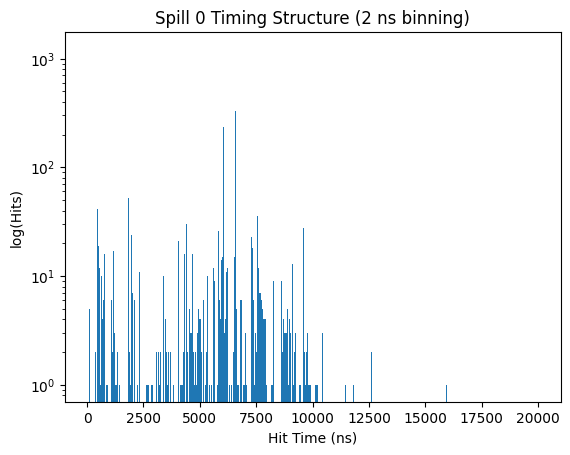

In [11]:
#Now lets look at the timing structure of a spill. Using event number is weird, so will just index. 
#This is bad code, will only hold for the 0th spill, can try and fix later.
#This is fairly slow to generate cuz python lol
SpillNo_branch = truth_info_tree['SpillNo']
EventNo_branch = truth_info_tree['EventNo']
EventT_branch = truth_info_tree['TrueHitT']
n_in_spill = 0
hit_times = []
spill_number = 0
for SpillNo in SpillNo_branch.arrays().SpillNo:
    if SpillNo == spill_number:
        n_in_spill += 1 
for index in range(n_in_spill):
    #print(EventT_branch.arrays()[index].TrueHitT)
    for hit_time in EventT_branch.arrays()[index].TrueHitT:
        hit_times.append(float(hit_time))
#print(hit_times)
print(np.size(hit_times))
print(np.max(hit_times))
print(np.min(hit_times))
plt.hist(hit_times, bins = 10000, log = True, range = (0,20000))
plt.xlabel("Hit Time (ns)")
plt.ylabel("log(Hits)")
plt.title(f"Spill {spill_number} Timing Structure (2 ns binning)")
plt.show() 

#Not really sure what to take from this, may be more useful to look in the subsection of a spill to try and pull the bunch structure.
#Doesn't look like bunch structure is actually stored anywhere. 
    
        
    


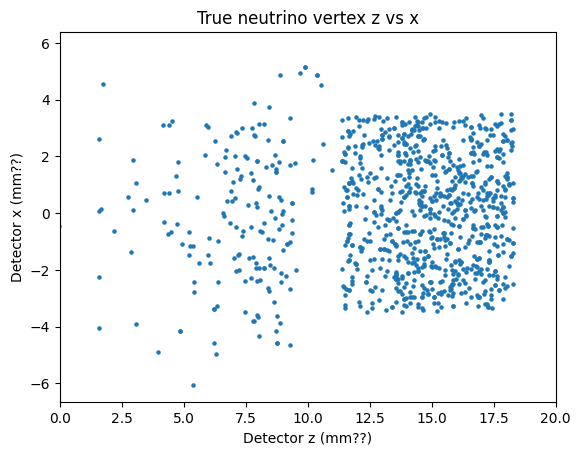

In [12]:
#Requested Plot: Check if the neutrino vertices are showing up in all parts of the detector. 
#According to the wiki truth level is pulling straight GENIE info. TruthInfoNSlices
#Growing suspicious about the event slicing here. Seeing duplicate vertices?
NeutrinoX4_branch = truth_info_tree['NeutrinoX4']
#NeutrinoX4_branch.arrays()
NeutrinoX4_branch.arrays().NeutrinoX4
neutrino_X = NeutrinoX4_branch.arrays().NeutrinoX4[0:,0] 
neutrino_Z = NeutrinoX4_branch.arrays().NeutrinoX4[0:,2]
plt.scatter(neutrino_Z, neutrino_X, s = 5)
plt.xlim((0,20))
plt.xlabel("Detector z (mm??)")
plt.ylabel("Detector x (mm??)") 
plt.title("True neutrino vertex z vs x")
plt.show()

#Quite the confusing plot lowkey. All in the first 20 mm???

In [13]:
#comparing TrueHits and TrueRecoHits
TrueRecoHitX_branch = truth_info_tree['TrueRecoHitX'] #whatever this even means
TrueHitX_branch = truth_info_tree['TrueHitX']
TrueRecoHitT_branch = truth_info_tree['TrueRecoHitT'] #whatever this even means
TrueHitT_branch = truth_info_tree['TrueHitT']
TrueRecoHitZ_branch = truth_info_tree['TrueRecoHitZ']
TrueHitZ_branch = truth_info_tree['TrueHitZ']


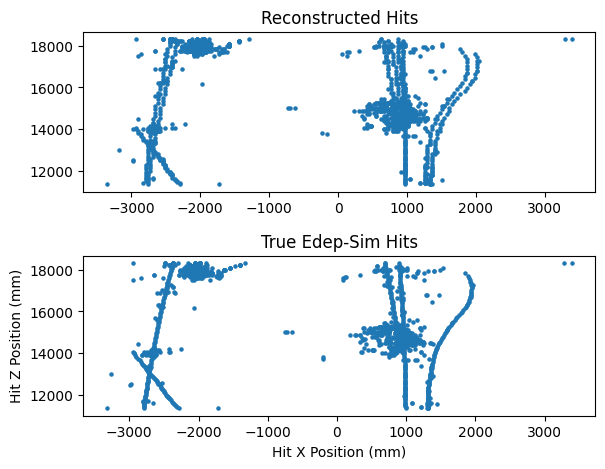

In [14]:
event_n = 6
TrueReco_x = TrueRecoHitX_branch.arrays()[event_n].TrueRecoHitX #reconstructed hits in x
TrueReco_z = TrueRecoHitZ_branch.arrays()[event_n].TrueRecoHitZ #reconstructed hits in z
TrueHits_x = TrueHitX_branch.arrays()[event_n].TrueHitX
TrueHits_z = TrueHitZ_branch.arrays()[event_n].TrueHitZ
fig, axs = plt.subplots(2)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
axs[0].scatter(TrueReco_x, TrueReco_z, s =5) #reco
axs[0].set(title = 'Reconstructed Hits')
axs[1].set(title = 'True Edep-Sim Hits' , xlabel='Hit X Position (mm)', ylabel='Hit Z Position (mm)')
axs[1].scatter(TrueHits_x, TrueHits_z, s = 5 ) #true

plt.show()
#ok so the weird appearance of the reconstructed hits (looks like two tracks) is really just the result of the layer staggering
#Single truth track appears like two in our reconstruction. I think

In [15]:
#Lets explore the reco tree a bit
reco_info_tree = reco_file['Reco_Tree']
reco_info_tree.keys()

['EventNo',
 'SliceNo',
 'SpillNo',
 'RunNo',
 'nTracks',
 'nHits',
 'TrackHitPos',
 'nKalmanNodes',
 'KalmanErrorDetVol',
 'nKalmanNodes_plus',
 'nKalmanNodes_minus',
 'KalmanPos',
 'RecoTrackKalmanFirstPlaneBarView',
 'RecoTrackKalmanLastPlaneBarView',
 'RecoTrackKalmanPlaneBarView',
 'KalmanTruePos',
 'RecoTrackKalmanFirstPlaneBarViewTrue',
 'RecoTrackKalmanLastPlaneBarViewTrue',
 'RecoTrackKalmanPlaneBarViewTrue',
 'StartDirection',
 'EndDirection',
 'StartPos',
 'EndPos',
 'EnergyRange',
 'EnergyDeposit',
 'Momentum',
 'Length',
 'Length_3D',
 'Charge',
 'Charge_Kalman',
 'Chi2',
 'Chi2_plus',
 'Chi2_minus',
 'TrackHitEnergies',
 'TrackHitBarType',
 'TimeSliceStartTime',
 'TimeSliceEndTime']

In [16]:
#for slice in reco_info_tree['SliceNo'].arrays().SliceNo:
#    #print(slice)
#ok this one is revealing, seems to tell us that each "event" is a slice? Number of slices matches number of events
np.size(reco_info_tree['SliceNo'].arrays().SliceNo) #1266 slices 

1266

In [17]:
reco_info_tree['TrackHitEnergies'].arrays().TrackHitEnergies

<Array [[], [[3.28, ..., -1e+09]], ..., [], []] type='1266 * var * 200 * fl...'>

In [18]:
#It lowkey doesn't seems like we have clean mapping from bar and plane info for the reconstructed hits. We could do just pure x and y matching though I think